Test Name | Description
--- | ---
Major28_2016-2019_1entry | Test with initial pass at refactor and single entry per setup
Major28_2016-2019_v2 | add filter for spread:ATR ratio

In [1]:
import pytools.leantools as lt
import pandas as pd
import os
from IPython.display import display

In [2]:
script_dir = os.path.abspath('') #<-- absolute dir the script is in
result_dir = os.path.join (script_dir, "../results/parallax/backtest4")
test_name="Major28_2016-2019_v2"
algo_result_filepath = os.path.join(result_dir, f'{test_name}.json')
analysis_data_filepath = os.path.join(result_dir, f'{test_name}-analysis_data.json')
SYMBOLS = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'USDCAD', 'AUDUSD', 'NZDUSD']
analysis_file_suffix = "-analysis_data"


In [3]:
# Print high level stats

stat_columns = ['TradeStats.TotalNumberOfTrades', 
             'TradeStats.ProfitLossRatio', 
             'PortfolioStats.AverageWinRate', 
             'PortfolioStats.AverageLossRate',
             'PortfolioStats.WinRate',
             'PortfolioStats.Drawdown',
            'PortfolioStats.TotalNetProfit']

def format_stats(stats_df):
    result = stats_df.transpose()
    result.loc['PortfolioStats.AverageWinRate'] = result.loc['PortfolioStats.AverageWinRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.AverageLossRate'] = result.loc['PortfolioStats.AverageLossRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.WinRate'] = result.loc['PortfolioStats.WinRate'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.Drawdown'] = result.loc['PortfolioStats.Drawdown'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.TotalNetProfit'] = result.loc['PortfolioStats.TotalNetProfit'].apply('{:,.2%}'.format)
    return result

def get_stats(symbols, timeframe):
    stats_list = []
    for s in symbols:
        name = f'{s}-{timeframe}'
        path = os.path.join(result_dir, f'{name}.json')
        stats = lt.get_trade_statistics(path)
        stats = stats[stat_columns]
        stats.rename(index={0:name}, inplace=True)
        stats_list.append(stats)

stats = lt.get_trade_statistics(algo_result_filepath)
stats = stats[stat_columns]
format_stats(stats)

,0
TradeStats.TotalNumberOfTrades,625
TradeStats.ProfitLossRatio,1.9733
PortfolioStats.AverageWinRate,1.60%
PortfolioStats.AverageLossRate,-0.80%
PortfolioStats.WinRate,30.7%
PortfolioStats.Drawdown,45.8%
PortfolioStats.TotalNetProfit,-34.39%


https://stackoverflow.com/questions/38107304/pandas-changing-a-specific-row-to-percentages

In [4]:
bar_data_df = lt.get_bar_data_df(analysis_data_filepath)
bar_data_df['ratioTop'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['top'], axis = 1)
bar_data_df['ratioBody'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['body'], axis = 1)
bar_data_df['ratioBottom'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['bottom'], axis = 1)

In [5]:
bar_data_df

,,BBMid,BBUpper,BBLower,StochK,StochD,atrPips,O,H,L,C,spread,ratioTop,ratioBody,ratioBottom
Symbol,Time,,,,,,,,,,,,,,
AUDCAD,2016-01-28 22:00:00+00:00,0.9959,1.0075,0.9844,31.7628,32.6098,109.9,0.993785,0.998755,0.989340,0.989910,12.4,0.527881,0.411577,0.060542
AUDCHF,2016-01-28 22:00:00+00:00,0.7050,0.7271,0.6828,87.9223,83.4377,136.0,0.718185,0.728090,0.717405,0.724820,11.4,0.306036,0.620964,0.073000
AUDJPY,2016-01-28 22:00:00+00:00,82.7432,85.8829,79.6036,88.0397,80.0833,193.2,84.168500,86.367500,84.012500,85.803500,9.5,0.239490,0.694268,0.066242
AUDNZD,2016-01-28 22:00:00+00:00,1.0730,1.0935,1.0526,91.6610,88.5812,107.6,1.092985,1.097585,1.089850,1.092830,40.0,0.594699,0.020039,0.385262
AUDUSD,2016-01-28 22:00:00+00:00,0.7000,0.7169,0.6831,81.7033,73.3698,105.8,0.708380,0.714085,0.705895,0.708360,4.2,0.696581,0.002442,0.300977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NZDJPY,2019-12-30 22:00:00+00:00,72.0626,73.6051,70.5200,88.7593,91.9691,50.8,73.253500,73.368500,72.997000,73.111500,12.5,0.309556,0.382234,0.308210
NZDUSD,2019-12-30 22:00:00+00:00,0.6605,0.6726,0.6484,93.2232,94.0295,41.2,0.672795,0.675575,0.671370,0.672915,3.5,0.632580,0.028537,0.338882
USDCAD,2019-12-30 22:00:00+00:00,1.3160,1.3293,1.3026,10.5644,12.1195,56.3,1.306935,1.306965,1.295170,1.299045,4.5,0.002543,0.668928,0.328529


In [6]:
closed_trades = lt.get_closed_trades_df(algo_result_filepath).drop(columns=['Direction', 'TotalFees', 'MAE', 'MFE', 'Symbol.ID', 'Symbol.Permtick'])
#closed_trades

Grab the trade signals

In [7]:
def get_r_multiple(row):
    if row.slPips != 0:
        return row.plPips / row.slPips
    else:
        return 0

trade_setups_df = lt.get_trade_setups_df(analysis_data_filepath)
# calculate some additional data
trade_setups_df['year'] = trade_setups_df.apply(lambda row: row.name.year, axis = 1)
trade_setups_df['weekday'] = trade_setups_df.apply(lambda row: row.name.weekday(), axis = 1)
trade_setups_df['RMultiple'] = trade_setups_df.apply(get_r_multiple, axis = 1)

#pd.set_option('display.max_rows', 500)
display(trade_setups_df)
#pd.reset_option('display.max_rows')

,symbol,direction,slPips,tpPips,plPips,tradeIndex,year,weekday,RMultiple
BarTime,,,,,,,,,
2016-01-31 22:00:00+00:00,GBPAUD,Buy,137.5,463.3,154.4,0,2016,6,1.122909
2016-02-01 22:00:00+00:00,CADJPY,Sell,81.3,274.0,0.0,-1,2016,0,0.000000
2016-02-01 22:00:00+00:00,NZDJPY,Sell,89.8,302.8,-83.2,1,2016,0,-0.926503
2016-02-01 22:00:00+00:00,USDJPY,Sell,67.0,226.0,0.0,-1,2016,0,0.000000
2016-02-01 22:00:00+00:00,AUDJPY,Sell,99.8,336.3,0.0,-1,2016,0,0.000000
...,...,...,...,...,...,...,...,...,...
2019-12-10 22:00:00+00:00,GBPCAD,Sell,53.0,178.5,0.0,620,2019,1,0.000000
2019-12-01 22:00:00+00:00,USDJPY,Sell,44.0,148.6,0.0,621,2019,6,0.000000
2019-12-16 22:00:00+00:00,NZDJPY,Sell,26.3,88.7,-31.4,622,2019,0,-1.193916


In [8]:
# Show R multiple grouped by symbol
r_by_symbol = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['symbol']).sum()
r_by_symbol.sort_values('RMultiple').style.hide_columns(['year', 'tradeIndex'])

,slPips,tpPips,plPips,weekday,RMultiple
symbol,,,,,
EURCHF,834.200000,2814.600000,-225.900000,76,-9.876096
EURAUD,1329.200000,4481.100000,-535.100000,45,-8.119221
NZDCHF,846.300000,2852.400000,-267.000000,44,-7.628084
GBPCHF,1422.300000,4794.300000,-430.200000,51,-6.972747
GBPAUD,2155.700000,7267.600000,-494.100000,63,-6.575738
NZDCAD,1266.000000,4267.700000,-357.100000,49,-5.539920
USDJPY,1089.200000,3672.200000,-309.200000,54,-5.208311
GBPCAD,2218.800000,7479.400000,-432.700000,52,-4.987395
GBPJPY,2137.400000,7205.100000,-358.200000,55,-4.457434


In [9]:
sum_r_group = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['year','weekday'])[['RMultiple']].sum()
#sum_r_group.plot(kind='bar', figsize=(20,5))

#pd.set_option('display.max_rows', 500)
display(sum_r_group)
#pd.reset_option('display.max_rows')

RMultiple
year weekday           
2016 0       -13.141721
     1         3.571527
     2        -0.837578
     3         1.089836
     6         1.261968
2017 0        -1.703698
     1        -0.432828
     2        -2.420982
     3        -4.991187
     6        -5.383922
2018 0        -5.784228
     1        -7.095482
     2        10.576164
     3       -14.493763
     6         3.435040
2019 0         0.870304
     1         6.242406
     2         3.183783
     3        -2.703927
     6       -11.238106

In [10]:
# Combine signal data with closed trade data
merged_trade_data = trade_setups_df.join(closed_trades, on='tradeIndex')
merged_trade_data

,symbol,direction,slPips,tpPips,plPips,tradeIndex,year,weekday,RMultiple,EntryTime,EntryPrice,Quantity,ExitTime,ExitPrice,ProfitLoss,Duration,EndTradeDrawdown,Symbol.Value
BarTime,,,,,,,,,,,,,,,,,,
2016-01-31 22:00:00+00:00,GBPAUD,Buy,137.5,463.3,154.4,0,2016,6,1.122909,2016-02-01T23:07:00Z,2.02946,102218.0,2016-02-03T00:31:00Z,2.04490,1109.44,1.01:24:00,-486.45,GBPAUD
2016-02-01 22:00:00+00:00,CADJPY,Sell,81.3,274.0,0.0,-1,2016,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01 22:00:00+00:00,NZDJPY,Sell,89.8,302.8,-83.2,1,2016,0,-0.926503,2016-02-02T22:02:00Z,78.12500,127845.0,2016-02-03T07:55:00Z,78.95700,-886.96,09:53:00,-1054.33,NZDJPY
2016-02-01 22:00:00+00:00,USDJPY,Sell,67.0,226.0,0.0,-1,2016,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01 22:00:00+00:00,AUDJPY,Sell,99.8,336.3,0.0,-1,2016,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10 22:00:00+00:00,GBPCAD,Sell,53.0,178.5,0.0,620,2019,1,0.000000,2019-12-11T22:02:00Z,1.73759,157956.0,2019-12-12T14:27:00Z,1.73759,0.00,16:25:00,-959.38,GBPCAD
2019-12-01 22:00:00+00:00,USDJPY,Sell,44.0,148.6,0.0,621,2019,6,0.000000,2019-12-03T00:51:00Z,109.11500,171514.0,2019-12-12T15:02:00Z,109.11500,0.00,9.14:11:00,-1070.02,USDJPY
2019-12-16 22:00:00+00:00,NZDJPY,Sell,26.3,88.7,-31.4,622,2019,0,-1.193916,2019-12-18T12:35:00Z,72.00000,278901.0,2019-12-18T21:46:00Z,72.31400,-799.25,09:11:00,-894.70,NZDJPY


In [11]:
merged_trade_data.reset_index(inplace=True)
merged_trade_data.set_index(['symbol', 'BarTime'])

,,direction,slPips,tpPips,plPips,tradeIndex,year,weekday,RMultiple,EntryTime,EntryPrice,Quantity,ExitTime,ExitPrice,ProfitLoss,Duration,EndTradeDrawdown,Symbol.Value
symbol,BarTime,,,,,,,,,,,,,,,,,
GBPAUD,2016-01-31 22:00:00+00:00,Buy,137.5,463.3,154.4,0,2016,6,1.122909,2016-02-01T23:07:00Z,2.02946,102218.0,2016-02-03T00:31:00Z,2.04490,1109.44,1.01:24:00,-486.45,GBPAUD
CADJPY,2016-02-01 22:00:00+00:00,Sell,81.3,274.0,0.0,-1,2016,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NZDJPY,2016-02-01 22:00:00+00:00,Sell,89.8,302.8,-83.2,1,2016,0,-0.926503,2016-02-02T22:02:00Z,78.12500,127845.0,2016-02-03T07:55:00Z,78.95700,-886.96,09:53:00,-1054.33,NZDJPY
USDJPY,2016-02-01 22:00:00+00:00,Sell,67.0,226.0,0.0,-1,2016,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUDJPY,2016-02-01 22:00:00+00:00,Sell,99.8,336.3,0.0,-1,2016,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GBPCAD,2019-12-10 22:00:00+00:00,Sell,53.0,178.5,0.0,620,2019,1,0.000000,2019-12-11T22:02:00Z,1.73759,157956.0,2019-12-12T14:27:00Z,1.73759,0.00,16:25:00,-959.38,GBPCAD
USDJPY,2019-12-01 22:00:00+00:00,Sell,44.0,148.6,0.0,621,2019,6,0.000000,2019-12-03T00:51:00Z,109.11500,171514.0,2019-12-12T15:02:00Z,109.11500,0.00,9.14:11:00,-1070.02,USDJPY
NZDJPY,2019-12-16 22:00:00+00:00,Sell,26.3,88.7,-31.4,622,2019,0,-1.193916,2019-12-18T12:35:00Z,72.00000,278901.0,2019-12-18T21:46:00Z,72.31400,-799.25,09:11:00,-894.70,NZDJPY


https://pandas.pydata.org/docs/user_guide/merging.html#timeseries-friendly-merging

In [28]:
# Merge trade data with bar data

# only grab attempted trades
attempted_trades = merged_trade_data[(merged_trade_data['slPips'] > 0)]
merged_setups = pd.merge(attempted_trades, bar_data_df, left_on=['symbol', 'BarTime'], right_on=['Symbol','Time'])
#merged_setups = pd.merge(attempted_trades, bar_data_df, left_index=True, right_on=['Symbol','Time'])

#merged_setups['range'] = merged_setups.apply(lambda row: (row.H - row.L) / 0.0001, axis = 1)
#merged_setups['rangeAtrRatio'] = merged_setups.apply(lambda row: row.range / row.atrPips, axis = 1)

# Calculate direction wick
def get_direction_wick(row):
    if row.direction == 'Sell':
        return row.ratioBottom
    else:
        return row.ratioTop
merged_setups['directionWickRatio'] = merged_setups.apply(get_direction_wick, axis=1)

# Calculate middle bb distance
def get_midbb_dist(row):
    if row.direction == 'Sell':
        return lt.invLerp(row.BBUpper, row.BBMid, row.C)
    else:
        return lt.invLerp(row.BBLower, row.BBMid, row.C)
    
merged_setups['bbMidDist'] = merged_setups.apply(get_midbb_dist, axis=1)

merged_setups['bodyAtrRatio'] = merged_setups.apply(lambda row: (abs(row.O - row.C) / lt.getPipSize(row.symbol)) / row.atrPips, axis=1)

def color_returns(val):
    if val <= 0:
        return 'color: red'
    else:
        return 'color: green'

merged_setups.reset_index()
merged_setups.set_index(['symbol', 'BarTime'])
#merged_setups.style.applymap(color_returns, subset=['RMultiple'])    
#merged_setups.style.hide_columns(['year', 'EntryTime', 'Quantity'])

#formatted = merged_setups[['symbol', 'RMultiple', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom', 'directionWickRatio']]
#formatted.style.applymap(color_returns, subset=['RMultiple'])

merged_setups['spreadAtrRatio'] = merged_setups.apply(lambda row: row.spread / row.atrPips, axis=1)
merged_setups[merged_setups['spread'] >= merged_setups['slPips']][['BarTime', 'symbol', 'atrPips', 'spread', 'slPips', 'RMultiple', 'spreadAtrRatio']].style
merged_setups.apply(lambda row: row.slPips - row.spread, axis=1).describe()

count    738.000000
mean      47.897967
std       29.687411
min        6.100000
25%       26.700000
50%       40.050000
75%       60.900000
max      192.700000
dtype: float64

In [13]:
#merged_closed_trades = merged_setups
merged_setups = merged_setups[(merged_setups['tradeIndex'] >= 0)]
winning_trades = merged_setups[(merged_setups['plPips'] > 0)]
losing_trades = merged_setups[(merged_setups['plPips'] < 0)]
describeColumns = ['slPips', 'tpPips', 'atrPips', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom']
winning_trades_desc = winning_trades.describe()[describeColumns]
losing_trades_desc = losing_trades.describe()[describeColumns]

#print(len(winning_trades))
#print(len(losing_trades))
#merged_setups[(merged_setups['RMultiple'] > -0.5) & (merged_setups['RMultiple'] < 0.5)]

-40.4923468254847

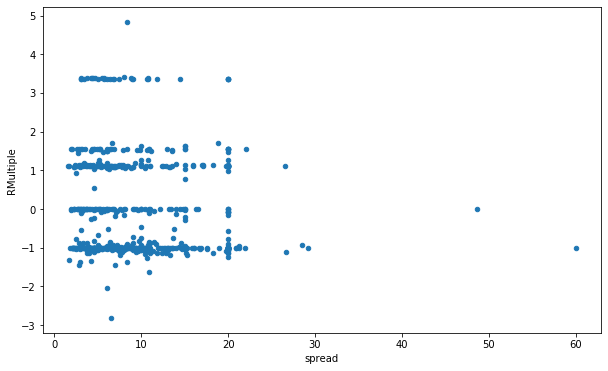

In [20]:
#winning_trades.bbMidDist.plot.hist(bins=50)
#merged_setups[merged_setups['spread'] >= 25]
merged_setups.plot.scatter(x='spread', y='RMultiple', figsize=(10,6))
merged_setups[merged_setups['bodyAtrRatio'] > 0.33].RMultiple.sum()

0.0

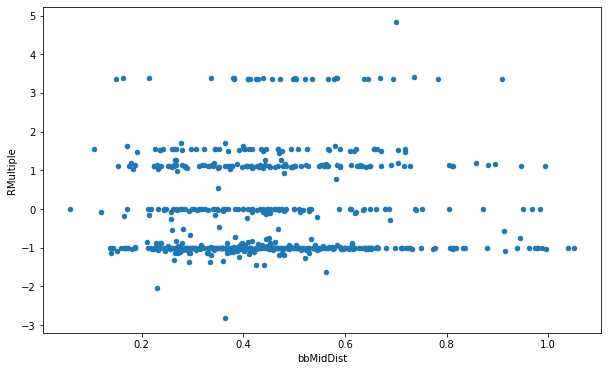

In [15]:
merged_setups.plot.scatter(x='bbMidDist', y='RMultiple', figsize=(10,6))
merged_setups[merged_setups['bbMidDist'] > 2].RMultiple.sum()

-11.486659426806233

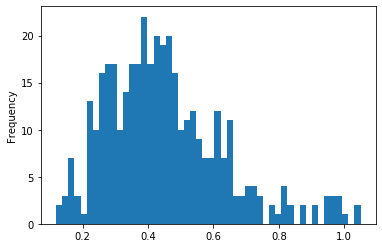

In [16]:
losing_trades.bbMidDist.plot.hist(bins=50)
losing_trades[losing_trades['bbMidDist'] >= 0.9].RMultiple.sum()

79.48641165760081

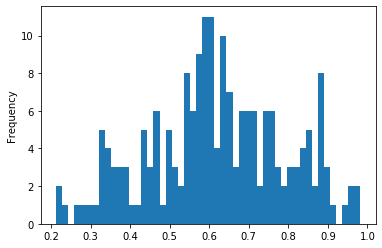

In [17]:
#winning_trades_desc
#winning_trades
winning_trades.ratioBody.plot.hist(bins=50)
winning_trades[winning_trades['ratioBody'] < 0.5].RMultiple.sum()

In [18]:
#todo: look at size relative to ATR